- ler o arquivo que esta na pasta SalesAnalysis
-  Merge the 12 months sales into a single csv file (list dir da "OS"
- add a month column: many parts
    - Drop Nan values from Data Frame
    - "OR"problem. Some date is not correct
- What was the best month of sales? how much was earned that month
    - convert datas type of the columns
    - add a column of sales that consist of price times quantity
    - the best month will be december
    - plot a bar grath with matplotlib and seaborn
 
    
- What city sold most?
    - add city column with city name and state to avoid duplicates
    - use de apply, split inside a formula*hint
    - plot the same grath but the x axle is cities
    
- what time shoud advertise to increase the likelihood of customer's buying product
    - plot a linear grath
    
    
- what product are more often sold together
    - novas bibliotecas 
    - exercício mais complexo 
    - caso venda com 2 produtos
    
- What product sold the most and why you think it sold the most?
    - plotar gráfico 
    - plotar o gráfico com barras e com linha de média de preços dos produtos no eixo

In [8]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

os.getcwd()
path = os.chdir('/Users/vinicius/Repos/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data_2')



None


In [143]:
files = os.listdir(path)

df = pd.DataFrame()
for file in files :
    temp = pd.read_csv(file)
    df = pd.concat([temp, df],ignore_index= True)
    
df = df.dropna()

df = df.loc[df['Order Date'].str[0:2]!='Or']
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.iloc[650:660]





,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
653,210548,iPhone,1,700,2019-06-09 10:45:00,"698 Lincoln St, New York City, NY 10001"
654,210549,USB-C Charging Cable,1,11.95,2019-06-25 18:19:00,"918 Johnson St, San Francisco, CA 94016"
655,210550,Lightning Charging Cable,1,14.95,2019-06-11 19:41:00,"226 Madison St, Atlanta, GA 30301"
656,210550,Lightning Charging Cable,1,14.95,2019-06-11 19:41:00,"226 Madison St, Atlanta, GA 30301"
657,210551,USB-C Charging Cable,1,11.95,2019-06-30 06:20:00,"523 Lake St, Boston, MA 02215"
658,210552,AA Batteries (4-pack),1,3.84,2019-06-12 19:41:00,"772 Johnson St, Seattle, WA 98101"
659,210553,Bose SoundSport Headphones,1,99.99,2019-06-25 17:54:00,"634 Wilson St, San Francisco, CA 94016"
660,210554,Lightning Charging Cable,2,14.95,2019-06-08 16:10:00,"321 Forest St, San Francisco, CA 94016"
661,210555,AAA Batteries (4-pack),2,2.99,2019-06-12 10:42:00,"314 7th St, San Francisco, CA 94016"
662,210556,AAA Batteries (4-pack),2,2.99,2019-06-07 13:43:00,"688 Cedar St, Boston, MA 02215"


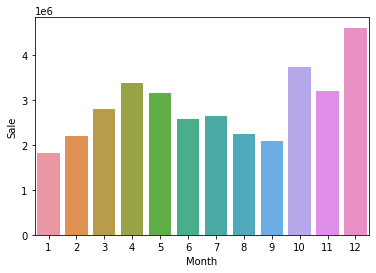

In [92]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Month'] = df['Order Date'].dt.month
df['Sale'] = df['Quantity Ordered'] * df['Price Each']
result = df.groupby('Month').sum().reset_index()
sns.barplot(x='Month',y='Sale',data=result);


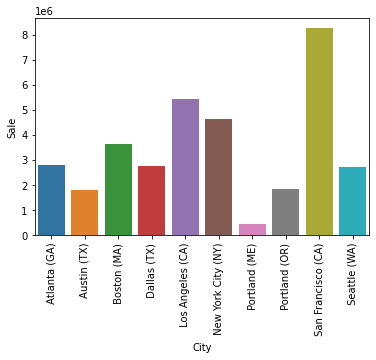

In [126]:
def city_address(address):
    return address.split(',')[1]
def state_address(address):
    return address.split(',')[2].split(' ')[1]
df['City'] = 'Na'
df['City'] = df['Purchase Address'].apply(lambda x: f"{city_address(x)} ({state_address(x)})")
results = df.groupby('City').sum().reset_index()
ax = sns.barplot(x='City',y='Sale',data=results);
ax.tick_params(axis='x', rotation=90)

In [145]:
df.sample(30)
df = df[df['Order ID'].duplicated(keep=False)]
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17,209938,iPhone,1,700.0,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101"
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101"
29,209949,Google Phone,1,600.0,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016"
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016"
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001"
...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035"
186773,319596,iPhone,1,700,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"
